In [ ]:
# !pip install transformers datasets torch scikit-learn
# !pip install evaluate
# !pip install load_metric
import pandas as pd
import requests
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments,pipeline
import torch
from bs4 import BeautifulSoup

In [ ]:
import os
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
# Load BERT model
from transformers import AutoTokenizer, AutoModelForMaskedLM

tokenizer = AutoTokenizer.from_pretrained("google-bert/bert-base-uncased")
model = AutoModelForMaskedLM.from_pretrained("google-bert/bert-base-uncased")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

BertForMaskedLM has generative capabilities, as `prepare_inputs_for_generation` is explicitly overwritten. However, it doesn't directly inherit from `GenerationMixin`. From 👉v4.50👈 onwards, `PreTrainedModel` will NOT inherit from `GenerationMixin`, and this model will lose the ability to call `generate` and other related functions.
  - If you're using `trust_remote_code=True`, you can get rid of this warning by loading the model with an auto class. See https://huggingface.co/docs/transformers/en/model_doc/auto#auto-classes
  - If you are the owner of the model architecture code, please modify your model class such that it inherits from `GenerationMixin` (after `PreTrainedModel`, otherwise you'll get an exception).
  - If you are not the owner of the model architecture class, please contact the model code owner to update it.
Some weights of the model checkpoint at google-bert/bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense

In [ ]:
# Load roBERTa to compare the performance.
from transformers import AutoTokenizer, AutoModelForMaskedLM

tokenizer_roberta = AutoTokenizer.from_pretrained("FacebookAI/roberta-base")
model_roberta = AutoModelForMaskedLM.from_pretrained("FacebookAI/roberta-base")

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [ ]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForMaskedLM

tokenizer = AutoTokenizer.from_pretrained("distilbert/distilbert-base-uncased")
model = AutoModelForMaskedLM.from_pretrained("distilbert/distilbert-base-uncased")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [ ]:
# Base URL of the website
base_url = "https://books.toscrape.com/catalogue/page-{}.html"

# Function to scrape details of a single book
def scrape_book_details(book_url):
    response = requests.get(book_url)
    soup = BeautifulSoup(response.content, "html.parser")

    # Extract title
    title = soup.find("h1").text.strip()

    # Extract genre (breadcrumb trail)
    genre = soup.find("ul", class_="breadcrumb").find_all("li")[2].text.strip()

    # Extract product description
    description_tag = soup.find("meta", {"name": "description"})
    description = description_tag["content"].strip() if description_tag else "No description available"

    return title, genre, description

# Initialize empty list to store book details
books_data = []

# Iterate over the first 5 pages
for page in range(51):
    print(f"Scraping page {page}...")
    response = requests.get(base_url.format(page))
    soup = BeautifulSoup(response.content, "html.parser")

    # Find all book links on the page
    books = soup.find_all("h3")
    for book in books:
        book_url = "https://books.toscrape.com/catalogue/" + book.a["href"]
        title, genre, description = scrape_book_details(book_url)
        books_data.append({"Title": title, "Genre": genre, "Description": description})

# Convert to DataFrame
df = pd.DataFrame(books_data)

# Save the DataFrame to a CSV file
df.to_csv("books_data.csv", index=False)

Scraping page 0...
Scraping page 1...
Scraping page 2...
Scraping page 3...
Scraping page 4...
Scraping page 5...
Scraping page 6...
Scraping page 7...
Scraping page 8...
Scraping page 9...
Scraping page 10...
Scraping page 11...
Scraping page 12...
Scraping page 13...
Scraping page 14...
Scraping page 15...
Scraping page 16...
Scraping page 17...
Scraping page 18...
Scraping page 19...
Scraping page 20...
Scraping page 21...
Scraping page 22...
Scraping page 23...
Scraping page 24...
Scraping page 25...
Scraping page 26...
Scraping page 27...
Scraping page 28...
Scraping page 29...
Scraping page 30...
Scraping page 31...
Scraping page 32...
Scraping page 33...
Scraping page 34...
Scraping page 35...
Scraping page 36...
Scraping page 37...
Scraping page 38...
Scraping page 39...
Scraping page 40...
Scraping page 41...
Scraping page 42...
Scraping page 43...
Scraping page 44...
Scraping page 45...
Scraping page 46...
Scraping page 47...
Scraping page 48...
Scraping page 49...
Scraping p

In [ ]:
len(df)

1000

In [ ]:
df.head()

,Title,Genre,Description
0,A Light in the Attic,Poetry,It's hard to imagine a world without A Light i...
1,Tipping the Velvet,Historical Fiction,"""Erotic and absorbing...Written with starling ..."
2,Soumission,Fiction,"Dans une France assez proche de la nôtre, un h..."
3,Sharp Objects,Mystery,"WICKED above her hipbone, GIRL across her hear..."
4,Sapiens: A Brief History of Humankind,History,From a renowned historian comes a groundbreaki...


We can observe that the scraped dataset is only 1000 rows. It won't be enough to train Bert effectively.
We found dataset on Kaggle conaining similar data and proceded to combine the two to increase training size.

In [ ]:
import pandas as pd
df = pd.read_csv('books_data.csv')
df2 = pd.read_csv('kaggle_book_data.csv')

In [ ]:
df.head()

,Title,Genre,Description
0,A Light in the Attic,Poetry,It's hard to imagine a world without A Light i...
1,Tipping the Velvet,Historical Fiction,"""Erotic and absorbing...Written with starling ..."
2,Soumission,Fiction,"Dans une France assez proche de la nôtre, un h..."
3,Sharp Objects,Mystery,"WICKED above her hipbone, GIRL across her hear..."
4,Sapiens: A Brief History of Humankind,History,From a renowned historian comes a groundbreaki...


In [ ]:
df2.head()

,index,title,genre,summary
0,0,Drowned Wednesday,fantasy,Drowned Wednesday is the first Trustee among ...
1,1,The Lost Hero,fantasy,"As the book opens, Jason awakens on a school ..."
2,2,The Eyes of the Overworld,fantasy,Cugel is easily persuaded by the merchant Fia...
3,3,Magic's Promise,fantasy,The book opens with Herald-Mage Vanyel return...
4,4,Taran Wanderer,fantasy,Taran and Gurgi have returned to Caer Dallben...


In [ ]:
# Standardize column names in the second dataset
df2 = df2.rename(columns={"summary": "Description","genre": "Genre","title":"Title"})
df2.drop(columns="index",inplace=True)
df2.head()

,Title,Genre,Description
0,Drowned Wednesday,fantasy,Drowned Wednesday is the first Trustee among ...
1,The Lost Hero,fantasy,"As the book opens, Jason awakens on a school ..."
2,The Eyes of the Overworld,fantasy,Cugel is easily persuaded by the merchant Fia...
3,Magic's Promise,fantasy,The book opens with Herald-Mage Vanyel return...
4,Taran Wanderer,fantasy,Taran and Gurgi have returned to Caer Dallben...


In [ ]:
df2['Genre'] = df2['Genre'].str.capitalize()

In [ ]:
# Next Let's compare genres available in both datasets
print(df['Genre'].unique())
print()
print(df2['Genre'].unique())

['Poetry' 'Historical Fiction' 'Fiction' 'Mystery' 'History' 'Young Adult'
 'Business' 'Default' 'Sequential Art' 'Music' 'Science Fiction'
 'Politics' 'Travel' 'Thriller' 'Food and Drink' 'Romance' 'Childrens'
 'Nonfiction' 'Art' 'Spirituality' 'Philosophy' 'New Adult' 'Contemporary'
 'Fantasy' 'Add a comment' 'Science' 'Health' 'Horror' 'Self Help'
 'Religion' 'Christian' 'Crime' 'Autobiography' 'Christian Fiction'
 'Biography' 'Womens Fiction' 'Erotica' 'Cultural' 'Psychology' 'Humor'
 'Historical' 'Novels' 'Short Stories' 'Suspense' 'Classics' 'Academic'
 'Sports and Games' 'Adult Fiction' 'Parenting' 'Paranormal']

['Fantasy' 'Science' 'Crime' 'History' 'Horror' 'Thriller' 'Psychology'
 'Romance' 'Sports' 'Travel']


In [ ]:
# Combine both datasets using concat
combined_df = pd.concat([df2[['Title', 'Genre', 'Description']], df[['Title', 'Genre', 'Description']]], ignore_index=True)


len(combined_df)
# Save or display the combined dataset
#combined_df.to_csv('combined_dataset.csv', index=False)  # Save to CSV
combined_df.head()

,Title,Genre,Description
0,Drowned Wednesday,Fantasy,Drowned Wednesday is the first Trustee among ...
1,The Lost Hero,Fantasy,"As the book opens, Jason awakens on a school ..."
2,The Eyes of the Overworld,Fantasy,Cugel is easily persuaded by the merchant Fia...
3,Magic's Promise,Fantasy,The book opens with Herald-Mage Vanyel return...
4,Taran Wanderer,Fantasy,Taran and Gurgi have returned to Caer Dallben...


In [ ]:
# Find duplicate titles, ignoring case
duplicates = combined_df[combined_df["Title"].str.lower().duplicated(keep=False)]

# Drop duplicate titles (case-insensitive)
cleaned_df = combined_df[~combined_df["Title"].str.lower().duplicated()]
#df_cleaned.to_csv('combined_dataset_cleaned.csv', index=False)
len(cleaned_df)

5174

In [ ]:
# We found that bookstoscrape website had Default genre that contained books from different genres.
# We needed to remove these titles in order to not confuse the models
cleaned_df[cleaned_df['Genre'] == 'Default']

,Title,Genre,Description
4664,The Coming Woman: A Novel Based on the Life of...,Default,"""If you have a heart, if you have a soul, Kare..."
4667,"Starving Hearts (Triangular Trade Trilogy, #1)",Default,"Since her assault, Miss Annette Chetwynd has b..."
4683,America's Cradle of Quarterbacks: Western Penn...,Default,"Any fan of the Baltimore Colts of my era, any ..."
4684,Aladdin and His Wonderful Lamp,Default,Planning on seeing Aladdin the Disney musical?...
4692,Penny Maybe,Default,"Sent to yet another foster family, Penny decid..."
...,...,...,...
5600,Taking Shots (Assassins #1),Default,Elli Fisher has never thought she was good eno...
5604,Shatter Me (Shatter Me #1),Default,I have a curseI have a giftI am a monsterI'm m...
5612,Paradise Lost (Paradise #1),Default,"‘Better to reign in Hell, than serve in Heav’n..."
5617,On the Road (Duluoz Legend),Default,On the Road chronicles Jack Kerouac's years tr...


In [ ]:
cleaned_df['Genre'].unique()

array(['Fantasy', 'Science', 'Crime', 'History', 'Horror', 'Thriller',
       'Psychology', 'Romance', 'Sports', 'Travel', 'Poetry',
       'Historical Fiction', 'Fiction', 'Young Adult', 'Business',
       'Default', 'Sequential Art', 'Music', 'Science Fiction',
       'Politics', 'Food and Drink', 'Childrens', 'Nonfiction', 'Art',
       'Spirituality', 'Philosophy', 'New Adult', 'Contemporary',
       'Add a comment', 'Mystery', 'Health', 'Self Help', 'Religion',
       'Christian', 'Autobiography', 'Christian Fiction', 'Biography',
       'Womens Fiction', 'Erotica', 'Cultural', 'Humor', 'Historical',
       'Novels', 'Short Stories', 'Suspense', 'Classics', 'Academic',
       'Adult Fiction', 'Parenting', 'Sports and Games', 'Paranormal'],
      dtype=object)

Historical Fiction:
The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull
Starving Hearts (Triangular Trade Trilogy, #1)

Nonfiction:
The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics
America's Cradle of Quarterbacks: Western Pennsylvania's Football Factory from Johnny Unitas to Joe Montana
Maude (1883-1993):She Grew Up with the country
Bossypants
A Piece of Sky, a Grain of Rice: A Memoir in Four Meditations
The Psychopath Test: A Journey Through the Madness Industry
The Art of War
Poses for Artists Volume 1 - Dynamic and Sitting Poses: An Essential Reference for Figure Drawing and the Human Form
Eureka Trivia 6.0
Unbroken: A World War II Story of Survival, Resilience, and Redemption


Childrens:
Aladdin and His Wonderful Lamp
Tracing Numbers on a Train
Grumbles

Fiction:
Penny Maybe
Soul Reader
Thirteen Reasons Why
The Kite Runner
The Emerald Mystery
Romero and Juliet: A Tragic Tale of Love and Zombies
Miss Peregrine’s Home for Peculiar Children (Miss Peregrine’s Peculiar Children #1)
Ayumi's Violin

SelfHelp:
The Inefficiency Assassin: Time Management Tactics for Working Smarter, Not Longer
The Secret (The Secret #1)
The Bridge to Consciousness: I'm Writing the Bridge Between Science and Our Old and New Beliefs.
Drive: The Surprising Truth About What Motivates Us

Lifestyle:
A World of Flavor: Your Gluten Free Passport

Thriller:
The Girl on the Train
Secrets and Lace (Fatal Hearts #1)
V for Vendetta (V for Vendetta Complete)

Romance:
Large Print Heart of the Pride
Beauty Restored (Riley Family Legacy Novellas #3)
Anonymous

Religion/Spirituality:

Amy Meets the Saints and Sages
First Steps for New Christians (Print Edition)

Crime:
Done Rubbed Out (Reightman & Bailey #1)

Fantasy:
Amatus




In [ ]:
cleaned_df = cleaned_df[~cleaned_df['Genre'].isin(['Default', 'Erotica'])]

In [ ]:
# Define a mapping dictionary to generalize the genres
genre_mapping = {
    'Poetry': 'Literature',
    'Historical Fiction': 'Literature',
    'Fiction': 'Literature',
    'Mystery': 'Mystery/Thriller',
    'History': 'History',
    'Young Adult': 'Literature',
    'Business': 'Business',
    'Sequential Art': 'Comics',
    'Music': 'Arts',
    'Science Fiction': 'Science Fiction/Fantasy',
    'Politics': 'Politics',
    'Travel': 'Travel',
    'Thriller': 'Mystery/Thriller',
    'Food and Drink': 'Lifestyle',
    'Romance': 'Romance',
    'Childrens': 'Children',
    'Nonfiction': 'Nonfiction',
    'Art': 'Arts',
    'Spirituality': 'Religion/Spirituality',
    'Philosophy': 'Philosophy',
    'New Adult': 'Literature',
    'Contemporary': 'Literature',
    'Fantasy': 'Science Fiction/Fantasy',
    'Science': 'Science',
    'Health': 'Health',
    'Horror': 'Horror',
    'Self Help': 'Self-Help',
    'Religion': 'Religion/Spirituality',
    'Christian': 'Religion/Spirituality',
    'Crime': 'Mystery/Thriller',
    'Autobiography': 'Biography',
    'Christian Fiction': 'Religion/Spirituality',
    'Biography': 'Biography',
    'Womens Fiction': 'Literature',
    'Erotica': 'Adult',
    'Cultural': 'Cultural',
    'Psychology': 'Psychology',
    'Humor': 'Humor',
    'Historical': 'History',
    'Novels': 'Literature',
    'Short Stories': 'Literature',
    'Suspense': 'Mystery/Thriller',
    'Classics': 'Classics',
    'Academic': 'Academic',
    'Sports and Games': 'Sports',
    'Adult Fiction': 'Literature',
    'Parenting': 'Parenting',
    'Paranormal': 'Science Fiction/Fantasy',
    'Sports': 'Sports'
}

# Apply the mapping to the 'Genre' column
cleaned_df['Genre'] = cleaned_df['Genre'].map(genre_mapping)

# Check the updated unique genres
print(cleaned_df['Genre'].unique())

['Science Fiction/Fantasy' 'Science' 'Mystery/Thriller' 'History' 'Horror'
 'Psychology' 'Romance' 'Sports' 'Travel' 'Literature' 'Business' 'Comics'
 'Arts' 'Politics' 'Lifestyle' 'Children' 'Nonfiction'
 'Religion/Spirituality' 'Philosophy' nan 'Health' 'Self-Help' 'Biography'
 'Cultural' 'Humor' 'Classics' 'Academic' 'Parenting']


In [ ]:
# saving the file
cleaned_df.to_csv('cleaned_dataset.csv', index=False)

In [ ]:
cleaned_df.head()

,Title,Genre,Description
0,Drowned Wednesday,Science Fiction/Fantasy,Drowned Wednesday is the first Trustee among ...
1,The Lost Hero,Science Fiction/Fantasy,"As the book opens, Jason awakens on a school ..."
2,The Eyes of the Overworld,Science Fiction/Fantasy,Cugel is easily persuaded by the merchant Fia...
3,Magic's Promise,Science Fiction/Fantasy,The book opens with Herald-Mage Vanyel return...
4,Taran Wanderer,Science Fiction/Fantasy,Taran and Gurgi have returned to Caer Dallben...


### First, We are training BERT model.

In [ ]:
# Step 1: Load Dataset
#file_path = "combined_dataset.csv"  # Replace with your local path to the dataset
#df = pd.read_csv(file_path)
df = cleaned_df
# Step 2: Preprocess Data
# Assuming the dataset has columns 'text' (book description) and 'genre'
df = df[['Genre', 'Description']].dropna()

# Encode genres as numeric labels
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['Genre'])

# Split the data into train and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['Description'].tolist(), df['label'].tolist(), test_size=0.2, random_state=42
)

# Step 3: Tokenize Data
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

def tokenize_function(texts):
    return tokenizer(texts, padding="max_length", truncation=True, max_length=512)

train_encodings = tokenize_function(train_texts)
val_encodings = tokenize_function(val_texts)

# Step 4: Convert Data to Hugging Face Dataset Format
class BookDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx])
        return item

train_dataset = BookDataset(train_encodings, train_labels)
val_dataset = BookDataset(val_encodings, val_labels)

# Step 5: Load Pre-trained Model
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", num_labels=len(label_encoder.classes_)
)

# Step 6: Define Training Arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=4,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10,
    save_total_limit=2,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
)

# Step 7: Define Trainer
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = torch.argmax(torch.tensor(logits), axis=1)
    accuracy = (predictions == torch.tensor(labels)).float().mean().item()
    return {"accuracy": accuracy}

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
)

# Step 8: Train the Model
trainer.train()

# Step 9: Evaluate the Model
eval_results = trainer.evaluate()
print("Evaluation Results:", eval_results)

# Step 10: Save the Model
model.save_pretrained("./bert_genre_model_books")
tokenizer.save_pretrained("./bert_genre_model_books")




tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Epoch,Training Loss,Validation Loss,Accuracy
1,1.204200,1.129567,0.701403
2,0.852300,0.884907,0.759519
3,0.620600,0.788312,0.788577
4,0.627600,0.770490,0.788577


Evaluation Results: {'eval_loss': 0.7883123755455017, 'eval_accuracy': 0.788577139377594, 'eval_runtime': 28.9807, 'eval_samples_per_second': 34.437, 'eval_steps_per_second': 2.174, 'epoch': 4.0}


('./bert_genre_model_books/tokenizer_config.json',
 './bert_genre_model_books/special_tokens_map.json',
 './bert_genre_model_books/vocab.txt',
 './bert_genre_model_books/added_tokens.json')

### Training roBERTa model.

In [ ]:
# Steps 1 and 2 are used from the BERT model code cell

# Step 3: Tokenize Data
from transformers import RobertaTokenizer

tokenizer = RobertaTokenizer.from_pretrained("roberta-base")

def tokenize_function(texts):
    return tokenizer(texts, padding="max_length", truncation=True, max_length=512)

train_encodings = tokenize_function(train_texts)
val_encodings = tokenize_function(val_texts)

# Step 4: Convert Data to Hugging Face Dataset Format
class BookDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx])
        return item

train_dataset = BookDataset(train_encodings, train_labels)
val_dataset = BookDataset(val_encodings, val_labels)

# Step 5: Load Pre-trained Model
from transformers import RobertaForSequenceClassification

model = RobertaForSequenceClassification.from_pretrained(
    "roberta-base", num_labels=len(label_encoder.classes_)
)

# Step 6: Define Training Arguments
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=4,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10,
    save_total_limit=2,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
)

# Step 7: Define Trainer
from transformers import Trainer

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = torch.argmax(torch.tensor(logits), axis=1)
    accuracy = (predictions == torch.tensor(labels)).float().mean().item()
    return {"accuracy": accuracy}

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
)

# Step 8: Train the Model
trainer.train()

# Step 9: Evaluate the Model
eval_results = trainer.evaluate()
print("Evaluation Results:", eval_results)

# Step 10: Save the Model
model.save_pretrained("./roberta_genre_model_books")
tokenizer.save_pretrained("./roberta_genre_model_books")

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Epoch,Training Loss,Validation Loss,Accuracy
1,1.067400,1.069910,0.681363
2,0.762200,0.839455,0.759519
3,0.625600,0.813351,0.762525


Epoch,Training Loss,Validation Loss,Accuracy
1,1.067400,1.069910,0.681363
2,0.762200,0.839455,0.759519
3,0.625600,0.813351,0.762525
4,0.537000,0.820509,0.774549


Evaluation Results: {'eval_loss': 0.8205093145370483, 'eval_accuracy': 0.774549126625061, 'eval_runtime': 27.6221, 'eval_samples_per_second': 36.13, 'eval_steps_per_second': 2.281, 'epoch': 4.0}


('./roberta_genre_model_books/tokenizer_config.json',
 './roberta_genre_model_books/special_tokens_map.json',
 './roberta_genre_model_books/vocab.json',
 './roberta_genre_model_books/merges.txt',
 './roberta_genre_model_books/added_tokens.json')

### Training distilBERT model.

In [ ]:
# Step 3: Tokenize Data
from transformers import DistilBertTokenizer

# Use the DistilBERT tokenizer
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")

def tokenize_function(texts):
    return tokenizer(texts, padding="max_length", truncation=True, max_length=512)

train_encodings = tokenize_function(train_texts)
val_encodings = tokenize_function(val_texts)

# Step 4: Convert Data to Hugging Face Dataset Format
class BookDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx])
        return item

train_dataset = BookDataset(train_encodings, train_labels)
val_dataset = BookDataset(val_encodings, val_labels)

# Step 5: Load Pre-trained Model
from transformers import DistilBertForSequenceClassification

# Use the DistilBERT model
model = DistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased", num_labels=len(label_encoder.classes_)
)

# Step 6: Define Training Arguments
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="./results_distilbert",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=4,
    weight_decay=0.01,
    logging_dir="./logs_distilbert",
    logging_steps=10,
    save_total_limit=2,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
)

# Step 7: Define Trainer
from transformers import Trainer

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = torch.argmax(torch.tensor(logits), axis=1)
    accuracy = (predictions == torch.tensor(labels)).float().mean().item()
    return {"accuracy": accuracy}

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
)

# Step 8: Train the Model
trainer.train()

# Step 9: Evaluate the Model
eval_results = trainer.evaluate()
print("Evaluation Results:", eval_results)

# Step 10: Save the Model
model.save_pretrained("./distilbert_genre_model_books")
tokenizer.save_pretrained("./distilbert_genre_model_books")


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Epoch,Training Loss,Validation Loss,Accuracy
1,1.194800,1.180124,0.663327
2,0.889000,0.926618,0.728457
3,0.816700,0.860414,0.761523
4,0.776100,0.842516,0.766533


Evaluation Results: {'eval_loss': 0.842516303062439, 'eval_accuracy': 0.7665330767631531, 'eval_runtime': 14.7697, 'eval_samples_per_second': 67.571, 'eval_steps_per_second': 4.265, 'epoch': 4.0}


('./distilbert_genre_model_books/tokenizer_config.json',
 './distilbert_genre_model_books/special_tokens_map.json',
 './distilbert_genre_model_books/vocab.txt',
 './distilbert_genre_model_books/added_tokens.json')

### Function to predict genres utilising each of the models

In [ ]:
# Defining function to predict book genres
def predict_genre(model, tokenizer, texts):
    """
    Predicts the genre of the input texts using the provided model and tokenizer.

    Args:
        model: The pre-trained model for sequence classification.
        tokenizer: The tokenizer corresponding to the model.
        texts: A list of strings to predict genres for.

    Returns:
        A list of predicted genre labels.
    """
    # Move model to GPU if available
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    # Tokenize the input texts
    encodings = tokenizer(texts, padding="max_length", truncation=True, max_length=512, return_tensors="pt")
    inputs = {key: val.to(device) for key, val in encodings.items()}  # Move inputs to the same device as the model

    # Perform inference
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        outputs = model(**inputs)
    predictions = torch.argmax(outputs.logits, axis=1).cpu().tolist()  # Move predictions back to CPU for readability

    # Convert numeric predictions back to genre labels
    return [label_encoder.inverse_transform([pred])[0] for pred in predictions]

In [ ]:
# Load saved BERT model and tokenizer
bert_model_path = "./bert_genre_model_books"
bert_tokenizer = AutoTokenizer.from_pretrained(bert_model_path)
bert_model = AutoModelForSequenceClassification.from_pretrained(bert_model_path)

# Load saved RoBERTa model and tokenizer
roberta_model_path = "./roberta_genre_model_books"
roberta_tokenizer = AutoTokenizer.from_pretrained(roberta_model_path)
roberta_model = AutoModelForSequenceClassification.from_pretrained(roberta_model_path)

# Load saved DistilBERT model and tokenizer
distilbert_model_path = "./distilbert_genre_model_books"
distilbert_tokenizer = AutoTokenizer.from_pretrained(distilbert_model_path)
distilbert_model = AutoModelForSequenceClassification.from_pretrained(distilbert_model_path)

# Test summaries
test_summaries = [
    "A thrilling mystery with unexpected twists and turns.",
    "A magical fantasy adventure full of dragons and wizards.",
    "A heartfelt romance story of love and loss."
]

# Predict genres with BERT
bert_predictions = predict_genre(bert_model, bert_tokenizer, test_summaries)
print("BERT Predicted Genres:", bert_predictions)

# Predict genres with RoBERTa
roberta_predictions = predict_genre(roberta_model, roberta_tokenizer, test_summaries)
print("RoBERTa Predicted Genres:", roberta_predictions)

# Predict genres with DistilBERT
distilbert_predictions = predict_genre(distilbert_model, distilbert_tokenizer, test_summaries)
print("DistilBERT Predicted Genres:", distilbert_predictions)


BERT Predicted Genres: ['Mystery/Thriller', 'Science Fiction/Fantasy', 'Romance']
RoBERTa Predicted Genres: ['Mystery/Thriller', 'Science Fiction/Fantasy', 'Romance']
DistilBERT Predicted Genres: ['Mystery/Thriller', 'Science Fiction/Fantasy', 'Romance']


### Performance evaluation

In [ ]:
# Library of summaries to test the performance
test_summaries = {
    "Snowman": "Oslo in November. The first snow of the season has fallen. A boy named Jonas wakes in the night to find his mother gone. Out his window, in the cold moonlight, he sees the snowman that inexplicably appeared in the yard earlier in the day. Around its neck is his mother's pink scarf. Hole suspects a link between a menacing letter he's received and the disappearance of Jonas's mother - and of perhaps a dozen other women, all of whom went missing on the day of a first snowfall. As his investigation deepens, something else emerges: he is becoming a pawn in an increasingly terrifying game whose rules are devised - and constantly revised - by the killer.",
    "Harry Potter": "Turning the envelope over, his hand trembling, Harry saw a purple wax seal bearing a coat of arms; a lion, an eagle, a badger and a snake surrounding a large letter.Harry Potter has never even heard of Hogwarts when the letters start dropping on the doormat at number four, Privet Drive. Addressed in green ink on yellowish parchment with a purple seal, they are swiftly confiscated by his grisly aunt and uncle. Then, on Harry's eleventh birthday, a great beetle-eyed giant of a man called Rubeus Hagrid bursts in with some astonishing news: Harry Potter is a wizard, and he has a place at Hogwarts School of Witchcraft and Wizardry. An incredible adventure is about to begin",
    "Sherlock Holmes":"Our first meeting with Sherlock Holmes. And John Watson's too! The young doctor is astonished by Holmes' many idiosyncrasies, including his talents on the violin.But it's not long before Sherlock Holmes, with Watson in tow, is working with Scotland Yard investigating the murder of two Americans whose deaths have some mysterious connection to sinister groups gathering power in both Britain and America.Here's where it all began, 'A Study in Scarlet.' Meet Sherlock Holmes, one of the world's leading consulting detectives - fictional of course!",
    "Notebook":"Set amid the austere beauty of the North Carolina coast begins the story of Noah Calhoun, a rural Southerner recently returned from the Second World War. Noah is restoring a plantation home to its former glory, and he is haunted by images of the beautiful girl he met fourteen years earlier, a girl he loved like no other. Unable to find her, yet unwilling to forget the summer they spent together, Noah is content to live with only memories...until she unexpectedly returns to his town to see him once again.Like a puzzle within a puzzle, the story of Noah and Allie is just the beginning. As it unfolds, their tale miraculously becomes something different, with much higher stakes. The result is a deeply moving portrait of love itself, the tender moments and the fundamental changes that affect us all. It is a story of miracles and emotions that will stay with you forever.",
    "Me Before You": "They had nothing in common until love gave them everything to lose . . .Louisa Clark is an ordinary girl living an exceedingly ordinary life—steady boyfriend, close family—who has barely been farther afield than their tiny village. She takes a badly needed job working for ex–Master of the Universe Will Traynor, who is wheelchair bound after an accident. Will has always lived a huge life—big deals, extreme sports, worldwide travel—and now he’s pretty sure he cannot live the way he is.Will is acerbic, moody, bossy—but Lou refuses to treat him with kid gloves, and soon his happiness means more to her than she expected. When she learns that Will has shocking plans of his own, she sets out to show him that life is still worth living.A Love Story for this generation and perfect for fans of John Green’s The Fault in Our Stars, Me Before You brings to life two people who couldn’t have less in common—a heartbreakingly romantic novel that asks, What do you do when making the person you love happy also means breaking your own heart",
    "Treasure Island": "For sheer storytelling delight and pure adventure, Treasure Island has never been surpassed. From the moment young Jim Hawkins first encounters the sinister Blind Pew at the Admiral Benbow Inn until the climactic battle for treasure on a tropic isle, the novel creates scenes and characters that have fired the imaginations of generations of readers. Written by a superb prose stylist, a master of both action and atmosphere, the story centers upon the conflict between good and evil - but in this case a particularly engaging form of evil. It is the villainy of that most ambiguous rogue Long John Silver that sets the tempo of this tale of treachery, greed, and daring. Designed to forever kindle a dream of high romance and distant horizons, Treasure Island is, in the words of G. K. Chesterton, 'the realization of an ideal, that which is promised in its provocative and beckoning map; a vision not only of white skeletons but also green palm trees and sapphire seas.' G. S. Fraser terms it 'an utterly original book' and goes on to write: 'There will always be a place for stories like Treasure Island that can keep boys and old men happy.'",
    "The Fault in Our Stars": "Despite the tumor-shrinking medical miracle that has bought her a few years, Hazel has never been anything but terminal, her final chapter inscribed upon diagnosis. But when a gorgeous plot twist named Augustus Waters suddenly appears at Cancer Kid Support Group, Hazel's story is about to be completely rewritten.Insightful, bold, irreverent, and raw, The Fault in Our Stars is award-winning author John Green's most ambitious and heartbreaking work yet, brilliantly exploring the funny, thrilling, and tragic business of being alive and in love.",
    "Why We Sleep: Unlocking the Power of Sleep and Dreams":"Neuroscientist and sleep expert Matthew Walker provides a revolutionary exploration of sleep, examining how it affects every aspect of our physical and mental well-being. Charting the most cutting-edge scientific breakthroughs, and marshalling his decades of research and clinical practice, Walker explains how we can harness sleep to improve learning, mood and energy levels, regulate hormones, prevent cancer, Alzheimer's and diabetes, slow the effects of aging, and increase longevity. He also provides actionable steps towards getting a better night's sleep every night.",
    "Soccernomics:...":"Why do England lose? Why does Scotland suck? Why doesn’t America dominate the sport internationally... and why do the Germans play with such an efficient but robotic style?These are questions every soccer aficionado has asked. Soccernomics answers them.Using insights and analogies from economics, statistics, psychology, and business to cast a new and entertaining light on how the game works, Soccernomics reveals the often surprisingly counter-intuitive truths about soccer.",
    "An Illustrated Life": "An artist's journal is packed with sketches and captions; some rough, some polished. The margins sometimes spill over with hurriedly scrawled shopping lists and phone numbers. The cover may be travel-worn and the pages warped from watercolors. Open the book, and raw creativity seeps from each color and line. The intimacy and freedom on its pages are almost like being inside the artist's You get a direct window into risks, lessons, mistakes, and dreams.The private worlds of these visual journals are exactly what you'll find inside An Illustrated Life . This book offers a sneak peak into the wildly creative imaginations of 50 top illustrators, designers and artists. Included are sketchbook pages from R. Crumb, Chris Ware, James Jean, James Kochalka, and many others. In addition, author Danny Gregory has interviewed each artist and shares their thoughts on living the artistic life through journaling.Watch artists—through words and images—record the world they see and craft the world as they want it to be. The pages of An Illustrated Life are sometimes startling, sometimes endearing, but always inspiring. Whether you're an illustrator, designer, or simply someone searching for inspiration, these pages will open a whole new world to you.",
    "Steve Jobs":"Walter Isaacson's worldwide bestselling biography of Apple cofounder Steve Jobs. Based on more than forty interviews with Steve Jobs conducted over two years--as well as interviews with more than 100 family members, friends, adversaries, competitors, and colleagues--Walter Isaacson has written a riveting story of the roller-coaster life and searingly intense personality of a creative entrepreneur whose passion for perfection and ferocious drive revolutionized six industries: personal computers, animated movies, music, phones, tablet computing, and digital publishing. Isaacson's portrait touched millions of readers. At a time when America is seeking ways to sustain its innovative edge, Jobs stands as the ultimate icon of inventiveness and applied imagination. He knew that the best way to create value in the twenty-first century was to connect creativity with technology. He built a company where leaps of the imagination were combined with remarkable feats of engineering. Although Jobs cooperated with the author, he asked for no control over what was written. He put nothing off-limits. He encouraged the people he knew to speak honestly. He himself spoke candidly about the people he worked with and competed against. His friends, foes, and colleagues offer an unvarnished view of the passions, perfectionism, obsessions, artistry, devilry, and compulsion for control that shaped his approach to business and the innovative products that resulted. His tale is instructive and cautionary, filled with lessons about innovation, character, leadership, and values. Steve Jobs is the inspiration for the movie of the same name starring Michael Fassbender, Kate Winslet, Seth Rogen, and Jeff Daniels, directed by Danny Boyle with a screenplay by Aaron Sorkin.",
    "The Gruffalo":"He has terrible tusks... and terrible claws... and terrible teeth in his terrible jaws.But do all those things make him the scariest creature in the deep dark wood? One brave little mouse with a big imagination doesn't think so!When Mouse takes a stroll through the woods, he meets a fox, an owl, and a snake who all want to eat him. So clever Mouse scares them off by warning them about the gruffalo who lives in the forest, a monster with terrible teeth and terrible claws. But what happens when Mouse's invented monster turns out to be real?The Gruffalo is an international best-selling and award-winning sensation with over 13.5 million copies in print worldwide. It has been made into an Oscar-nominated animated film as well as a stage musical that was performed on Broadway, and was voted England's favorite bedtime story."
}

# Predict genres for all summaries
predicted_genres_bert = {title: predict_genre(bert_model,bert_tokenizer, [summary])[0] for title, summary in test_summaries.items()}
predicted_genres_roberta = {title: predict_genre(roberta_model,roberta_tokenizer, [summary])[0] for title, summary in test_summaries.items()}
predicted_genres_distilbert = {title: predict_genre(distilbert_model,distilbert_tokenizer, [summary])[0] for title, summary in test_summaries.items()}

# Display predictions
for title, genre in predicted_genres_bert.items():
    print(f"Book: {title}, Predicted Genre: {genre}")
print(" ")
for title, genre in predicted_genres_roberta.items():
    print(f"Book: {title}, Predicted Genre: {genre}")
print(" ")
for title, genre in predicted_genres_distilbert.items():
    print(f"Book: {title}, Predicted Genre: {genre}")

Book: Snowman, Predicted Genre: Mystery/Thriller
Book: Harry Potter, Predicted Genre: Science Fiction/Fantasy
Book: Sherlock Holmes, Predicted Genre: Mystery/Thriller
Book: Notebook, Predicted Genre: History
Book: Me Before You, Predicted Genre: Romance
Book: Treasure Island, Predicted Genre: Science Fiction/Fantasy
Book: The Fault in Our Stars, Predicted Genre: Romance
Book: Why We Sleep: Unlocking the Power of Sleep and Dreams, Predicted Genre: Psychology
Book: Soccernomics:..., Predicted Genre: Sports
Book: An Illustrated Life, Predicted Genre: Travel
Book: Steve Jobs, Predicted Genre: Psychology
Book: The Gruffalo, Predicted Genre: Science Fiction/Fantasy
 
Book: Snowman, Predicted Genre: Mystery/Thriller
Book: Harry Potter, Predicted Genre: Science Fiction/Fantasy
Book: Sherlock Holmes, Predicted Genre: Mystery/Thriller
Book: Notebook, Predicted Genre: History
Book: Me Before You, Predicted Genre: Romance
Book: Treasure Island, Predicted Genre: Science Fiction/Fantasy
Book: The Fa

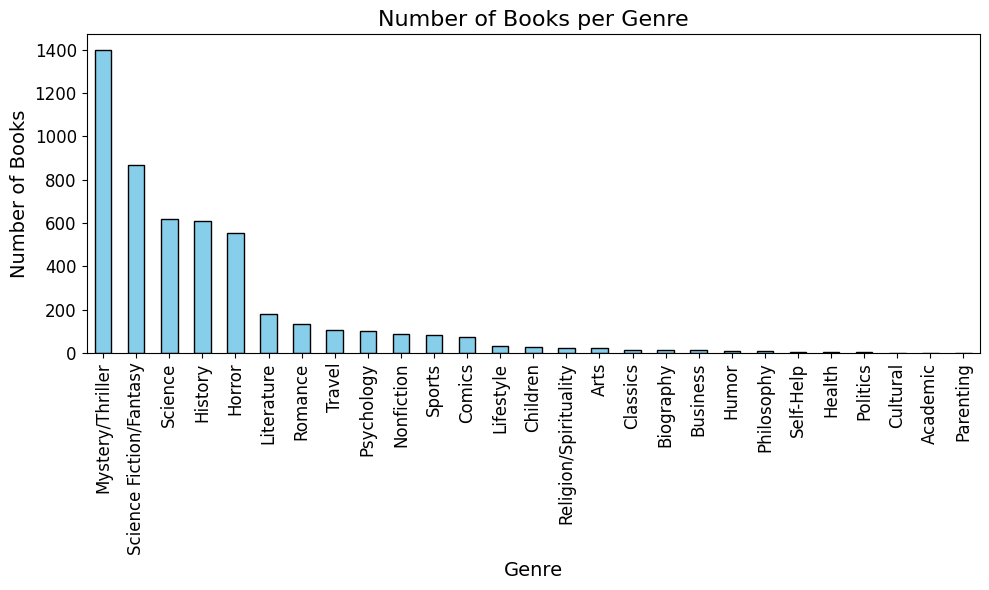

In [ ]:
import matplotlib.pyplot as plt

#Plotting
genre_counts = cleaned_df["Genre"].value_counts()

# Plot the genre counts
plt.figure(figsize=(10, 6))
genre_counts.plot(kind="bar", color="skyblue", edgecolor="black")

# Customize the plot
plt.title("Number of Books per Genre", fontsize=16)
plt.xlabel("Genre", fontsize=14)
plt.ylabel("Number of Books", fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
# We discovered that models have hard time to predict Children's books.
# Looking at the original df to see what books models trined on.
cleaned_df[cleaned_df["Genre"] == "Children"]

,Title,Genre,Description
4682,Birdsong: A Story in Pictures,Children,Bring the thrilling story of one red bird to l...
4690,The Bear and the Piano,Children,"One day, a young bear stumbles upon something ..."
4713,The Secret of Dreadwillow Carse,Children,A princess and a peasant girl must embark on a...
4792,The White Cat and the Monk: A Retelling of the...,Children,A monk leads a simple life. He studies his boo...
4840,Little Red,Children,"On her way to Grandmas house, Little Red Ridin..."
4880,Walt Disney's Alice in Wonderland,Children,The fantastical tale of a young girl chasing h...
4884,Twenty Yawns,Children,Featuring lyrical text and beautiful illustrat...
4929,Rain Fish,Children,Get to know the “rain fish” that come to life ...
4933,Once Was a Time,Children,"In the war-ravaged England of 1940, Charlotte ..."
4943,Luis Paints the World,Children,Luis wishes Nico wasn't leaving for the Army. ...
